<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Assignment 8: Deep Learning</b></h1>


**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from tensorflow.python.client import device_lib
from tensorflow import keras
from tqdm import tqdm

from keras.models import Model
from keras.layers import Dense, InputLayer
from keras.layers import Activation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
print("Num GPUs:", len(tf.config.list_physical_devices('GPU')))

Num GPUs: 1


# Data Processing

## Download Data

In [3]:
!gdown --id 1KwqXEusJ0-yj54_Hgz9eJfbo4mfR_fVv

Downloading...
From: https://drive.google.com/uc?id=1KwqXEusJ0-yj54_Hgz9eJfbo4mfR_fVv
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 45.0MB/s]


In [4]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## OneHot

In [5]:
# Do gender chỉ có 2 giá trị nên em covert về 0 và 1
data['Gender'] = data['Gender'].apply(lambda x : 1 if x=='Male' else 0)
# Dùng OneHot vector cho feature Geography
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data = pd.concat([data, pd.get_dummies(data['Geography'])], axis=1)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Scaler

In [6]:
X, y =data.drop(columns=['Geography', 'Exited']), data['Exited']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_train.shape

(8000, 1)

# Build Model

In [10]:
#from keras.models import Sequential
model = keras.models.Sequential([
                    #Lớp input đầu vào
                    InputLayer(input_shape=(12,)),
                    #Hidden Layers
                    Dense(6, activation='relu'),
                    Dense(6, activation='relu'),
                    #Output
                    Dense(1, activation='sigmoid')
])

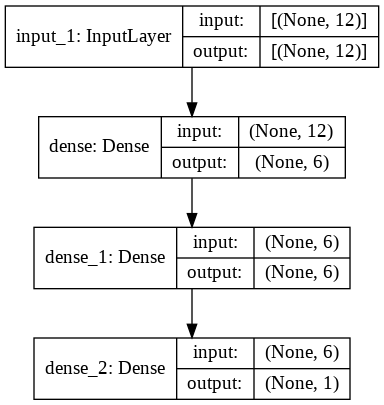

In [11]:
#Show model
keras.utils.plot_model(model, "ResNet.png", show_shapes=True)

In [12]:
#Cài đặt 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

#Training

In [13]:
modelbase = model

In [14]:
modelbase.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5946 - accuracy: 0.7000 - val_loss: 0.4992 - val_accuracy: 0.8000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7939 - val_loss: 0.4487 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7977 - val_loss: 0.4298 - val_accuracy: 0.8075
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8019 - val_loss: 0.4187 - val_accuracy: 0.8188
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8067 - val_loss: 0.4107 - val_accuracy: 0.8244
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8109 - val_loss: 0.4051 - val_accuracy: 0.8288
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8164 - val_loss: 0.4008 - val_accuracy: 0.8313

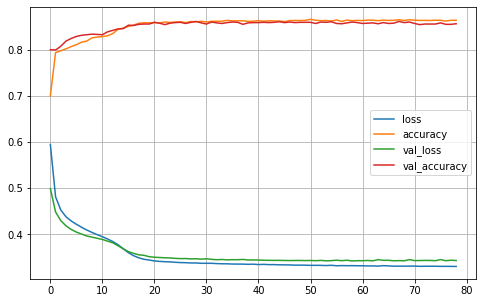

In [15]:
with tf.device('/device:GPU:0'):
  history_model = modelbase.fit(x_train, y_train, 
                            epochs = 100, 
                            validation_split = 0.2, callbacks = early_stopping_cb)

pd.DataFrame(history_model.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [16]:
print("Evaluate on test data")
results = modelbase.evaluate(x_test, y_test, batch_size=1)
print("test loss, test acc:", results)

Evaluate on test data
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8615
test loss, test acc: [0.33775606751441956, 0.8615000247955322]


#K-Fold

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8671
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8666
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8661
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8670
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8662
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8669
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8666
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8658
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8662
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3259 - accura

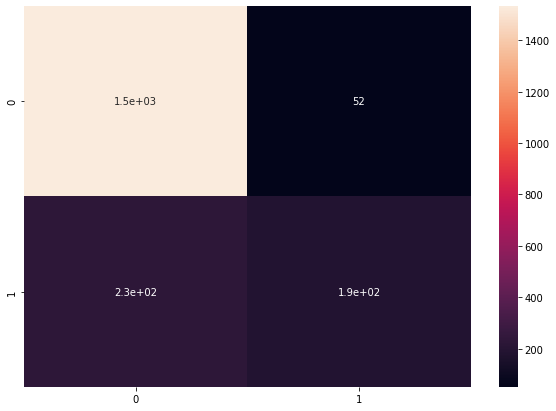

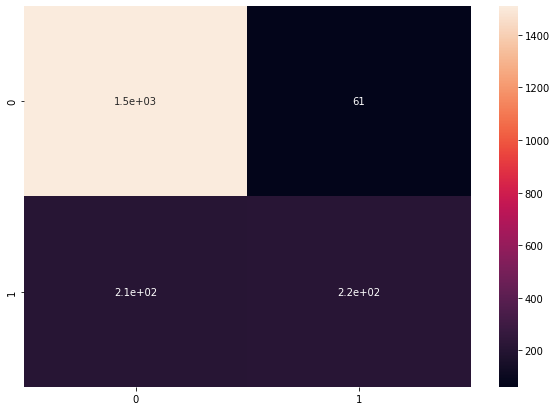

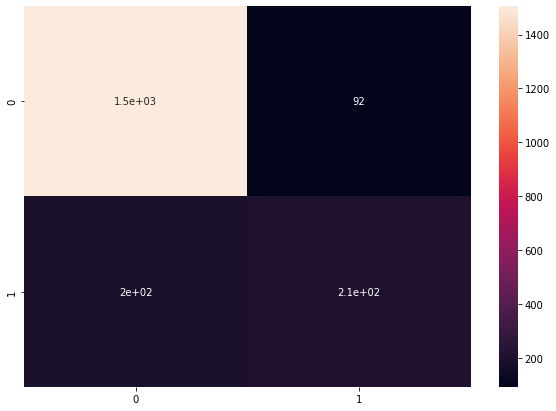

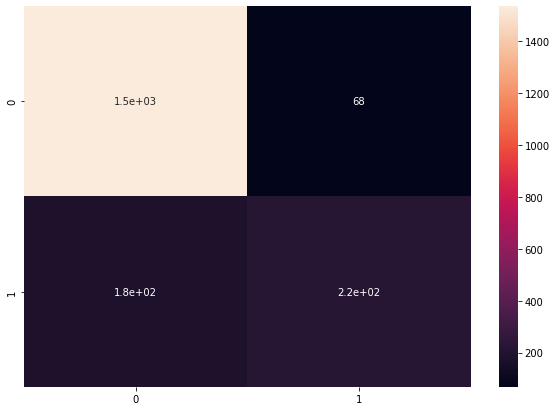

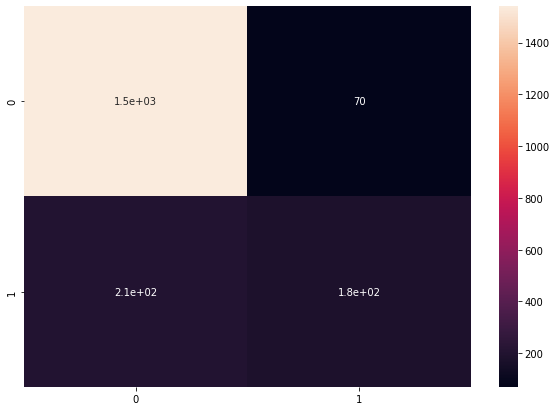

In [18]:
kf = KFold(n_splits=5, shuffle=False, random_state=42)
kf.get_n_splits(X)
report = []
models = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  tmp_model = model

  with tf.device('/device:GPU:0'):
    tmp_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    tmp_model.fit(X_train, y_train, batch_size = 32, epochs = 100)

  models.append(tmp_model)
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5)
  cm = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm)
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  report.append(classification_report(y_test, y_pred))

In [19]:
report

['              precision    recall  f1-score   support\n\n           0       0.87      0.97      0.92      1584\n           1       0.78      0.45      0.58       416\n\n    accuracy                           0.86      2000\n   macro avg       0.83      0.71      0.75      2000\nweighted avg       0.85      0.86      0.85      2000\n',
 '              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92      1570\n           1       0.78      0.51      0.61       430\n\n    accuracy                           0.86      2000\n   macro avg       0.83      0.73      0.77      2000\nweighted avg       0.86      0.86      0.85      2000\n',
 '              precision    recall  f1-score   support\n\n           0       0.89      0.94      0.91      1597\n           1       0.69      0.52      0.59       403\n\n    accuracy                           0.86      2000\n   macro avg       0.79      0.73      0.75      2000\nweighted avg       0.85      0.86      0.